In [176]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [133]:
train = pd.read_csv(r"C:\Users\RoseA\Analysis\Titanic Analysis\train.csv")
test = pd.read_csv(r"C:\Users\RoseA\Analysis\Titanic Analysis\test.csv")

# Data Analysis

In [134]:
train.shape

(891, 12)

In [135]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [136]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<AxesSubplot:xlabel='Survived', ylabel='count'>

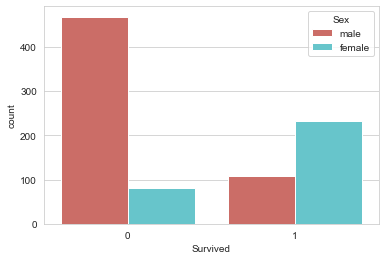

In [137]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Sex", data=train, palette="hls")

<AxesSubplot:xlabel='Survived', ylabel='count'>

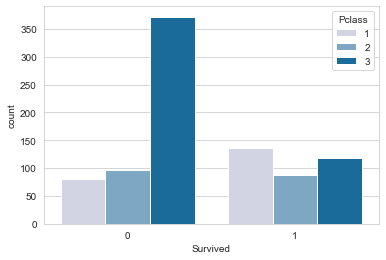

In [138]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Pclass", data=train, palette="PuBu")

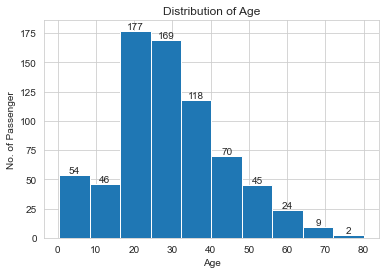

In [139]:
values, bins, bars = plt.hist(train["Age"], edgecolor='white')
plt.xlabel("Age")
plt.ylabel("No. of Passenger")
plt.title("Distribution of Age")
plt.bar_label(bars)
plt.show()

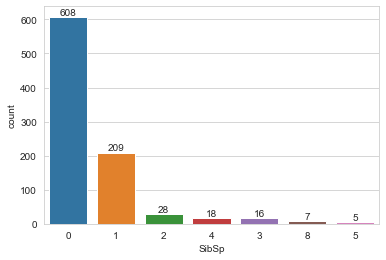

In [140]:
ax = sns.countplot(x= train["SibSp"],
                   order=train["SibSp"].value_counts(ascending=False).index);

abs_values = train["SibSp"].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

# Data Wrangling

In [141]:
#Data Wrangling

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

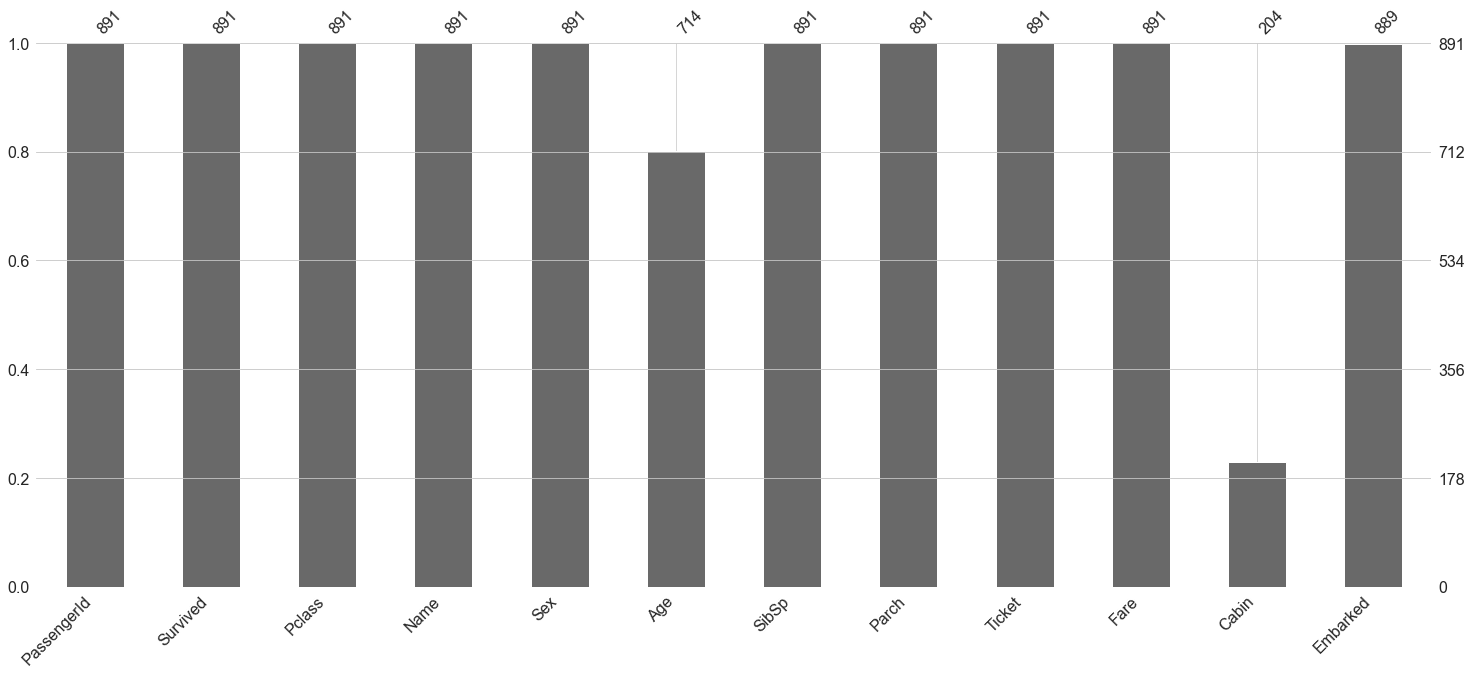

In [142]:
msno.bar(train)

<AxesSubplot:>

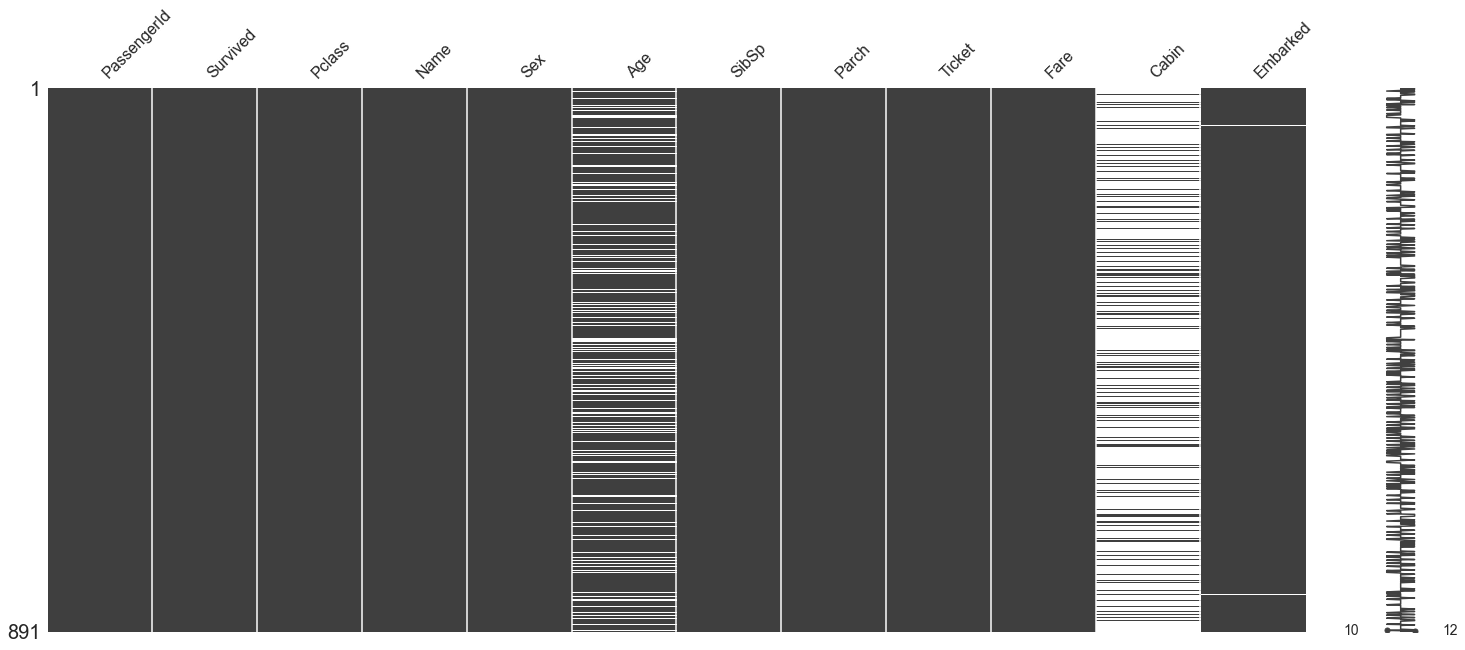

In [143]:
msno.matrix(train)

<AxesSubplot:>

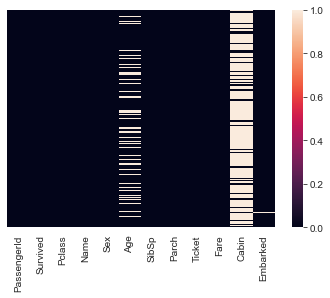

In [144]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=True)

<AxesSubplot:>

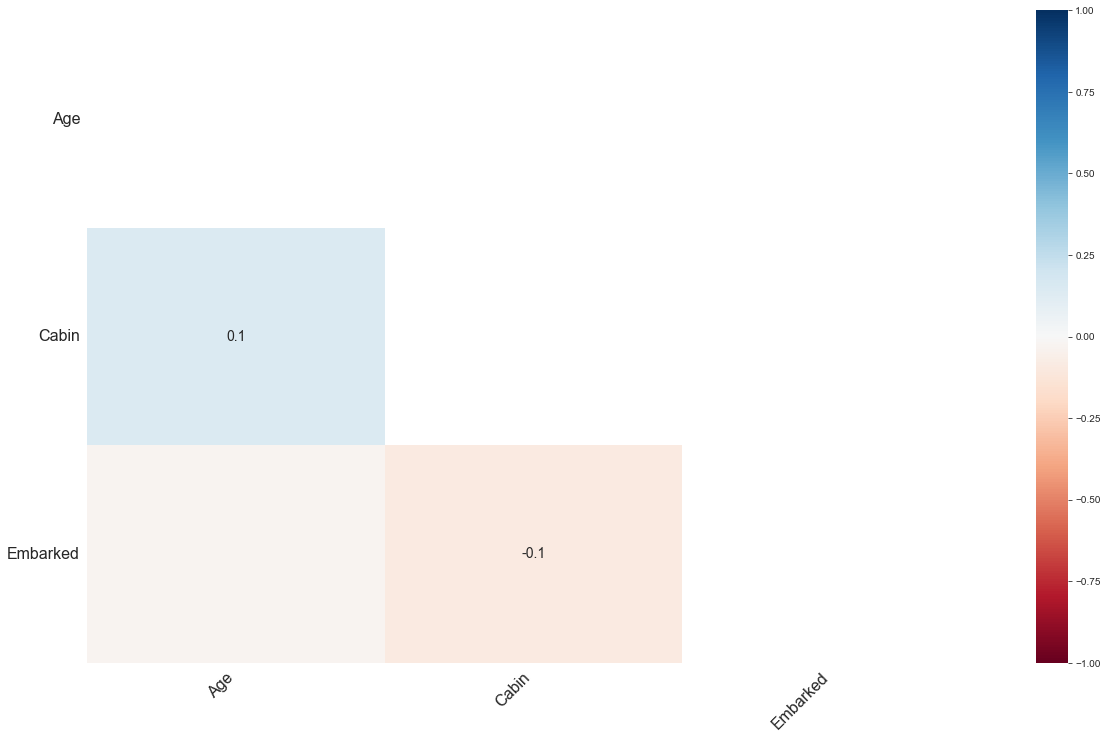

In [145]:
msno.heatmap(train)

In [146]:
train.dropna(subset=["Embarked"], axis=0, how="any",inplace=True)

<AxesSubplot:>

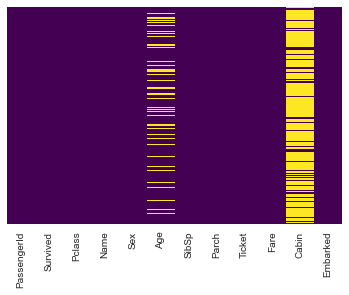

In [147]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [148]:
train.drop("Cabin", axis=1, inplace=True)

using mean of the ages by passenger classes to fill the missing age data.

In [149]:
mean_age_perclass = train.groupby(["Pclass"])["Age"].mean()
print(mean_age_perclass)

Pclass
1    38.105543
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [150]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else: 
            return 24
    else:
        return Age

In [151]:
train["Age"] = train[["Age", "Pclass"]].apply(impute_age, axis=1)

Converting few columns into categorical data to apply logistic Regression

In [152]:
sex = pd.get_dummies(train["Sex"], drop_first=True)
pclass = pd.get_dummies(train["Pclass"], drop_first=True)
embark = pd.get_dummies(train["Embarked"], drop_first=True)

In [153]:
train = pd.concat([train, pclass, embark, sex], axis=1)

In [154]:
train.columns

Index(['PassengerId',    'Survived',      'Pclass',        'Name',
               'Sex',         'Age',       'SibSp',       'Parch',
            'Ticket',        'Fare',    'Embarked',             2,
                   3,           'Q',           'S',        'male'],
      dtype='object')

In [155]:
train.drop(["Pclass", "Sex", "Embarked"], axis=1, inplace=True)

In [156]:
train.drop(["PassengerId", "Name", "Fare","Ticket"], axis=1, inplace=True)

In [157]:
train.head()

,Survived,Age,SibSp,Parch,2,3,Q,S,male
0,0,22.0,1,0,0,1,0,1,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,1,0,1,0
3,1,35.0,1,0,0,0,0,1,0
4,0,35.0,0,0,0,1,0,1,1


# Building a Logistic Regression Model

In [158]:
train.drop("Survived", axis=1).head()

,Age,SibSp,Parch,2,3,Q,S,male
0,22.0,1,0,0,1,0,1,1
1,38.0,1,0,0,0,0,0,0
2,26.0,0,0,0,1,0,1,0
3,35.0,1,0,0,0,0,1,0
4,35.0,0,0,0,1,0,1,1


In [159]:
train["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [172]:
X_train, X_test, y_train, y_test = train_test_split(train.drop("Survived", axis=1),
                                                    train["Survived"], test_size=0.30,
                                                    random_state=101)

Training and Predicting

In [163]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\RoseA\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression()

In [166]:
predictions = logmodel.predict(X_test)

C:\Users\RoseA\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [167]:
accuracy= confusion_matrix(y_test, predictions)

In [168]:
accuracy

array([[149,  14],
       [ 33,  71]], dtype=int64)

In [171]:
accuracy = accuracy_score(y_test, prediction)
accuracy

0.8239700374531835